# EDA on IPL Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ipl = pd.read_csv("matches.csv")

In [3]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


## Data Cleaning

In [5]:
ipl["date"] = pd.to_datetime(ipl["date"], format = "%d-%m-%Y")

In [6]:
ipl.shape

(756, 18)

In [7]:
ipl.duplicated().sum()

0

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [9]:
ipl.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
# Percentage of Null values
ipl.isnull().sum() / len(ipl) *100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

<Axes: >

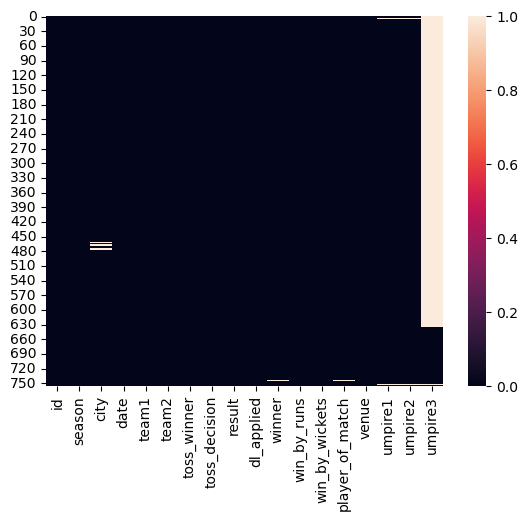

In [11]:
sns.heatmap(ipl.isnull())

In [12]:
# Dropping column Umpire3 with most of the null values.
ipl.drop(["umpire3"], axis = 1, inplace = True)

In [13]:
#Dropping rows with null values
ipl.dropna(inplace = True)

## EDA and Data Visualization

In [16]:
#Most man of the match award
ipl["player_of_match"].value_counts().head(5)

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
Name: count, dtype: int64

In [20]:
top_5 = ipl["player_of_match"].value_counts().head(5).reset_index()
top_5

,player_of_match,count
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17


<Axes: xlabel='player_of_match', ylabel='count'>

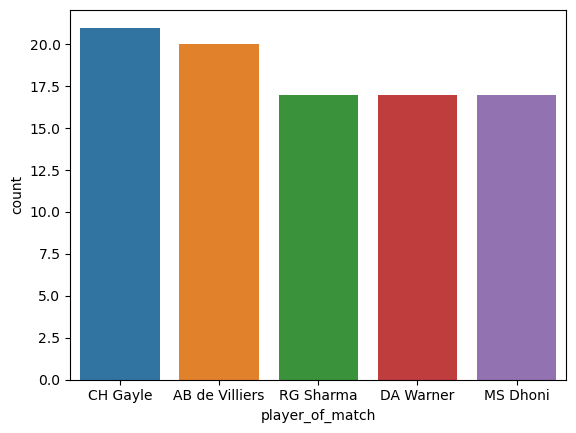

In [22]:
#making a bar-plot for the top 5 players with most man of the match awards
sns.barplot(data=top_5, x="player_of_match", y="count")

In [24]:
#Getting the frequency of result column
ipl["result"].value_counts()

result
normal    734
tie         9
Name: count, dtype: int64

In [25]:
#Finding out the number of toss wins w.r.t each team
ipl["toss_winner"].value_counts()

toss_winner
Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [27]:
#Extracting the records where a team won by batting first
batting_won = ipl[ipl["win_by_runs"]!=0]

In [28]:
batting_won.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin


Text(0.5, 1.0, 'Distribution of Winning Runs')

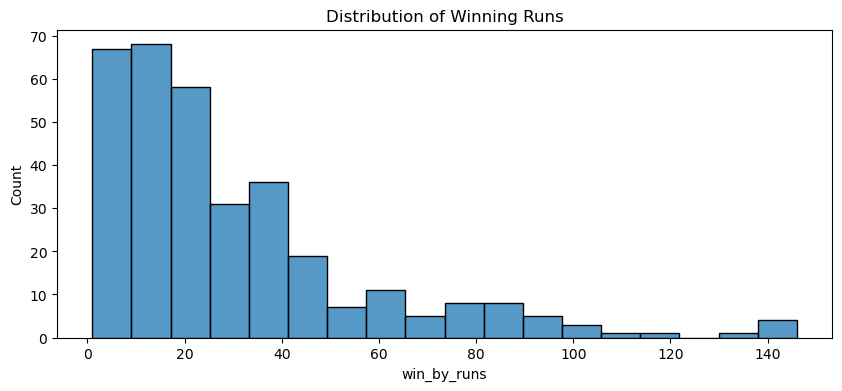

In [42]:
plt.figure(figsize=(10,4))
sns.histplot(data=batting_won, x="win_by_runs")
plt.title("Distribution of Winning Runs")

In [46]:
#Finding out the number of wins w.r.t each team after batting first
top_5_bat_win = batting_won["winner"].value_counts().head().reset_index()

<Axes: xlabel='winner', ylabel='count'>

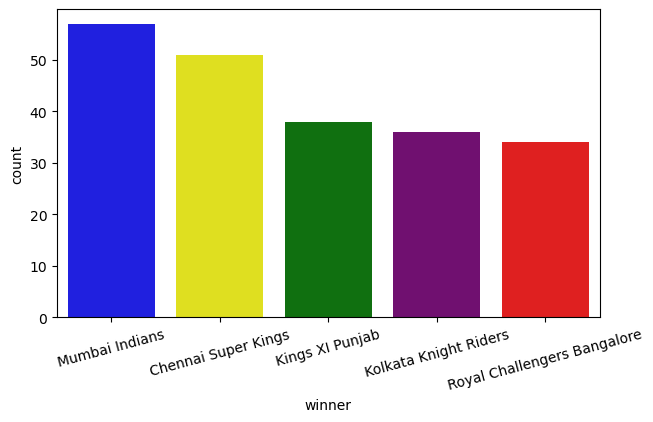

In [90]:
plt.figure(figsize =(7,4))
plt.xticks(rotation = 15)
sns.barplot(data=top_5_bat_win , x="winner", y="count",palette = ["blue","yellow","green","purple","red"])


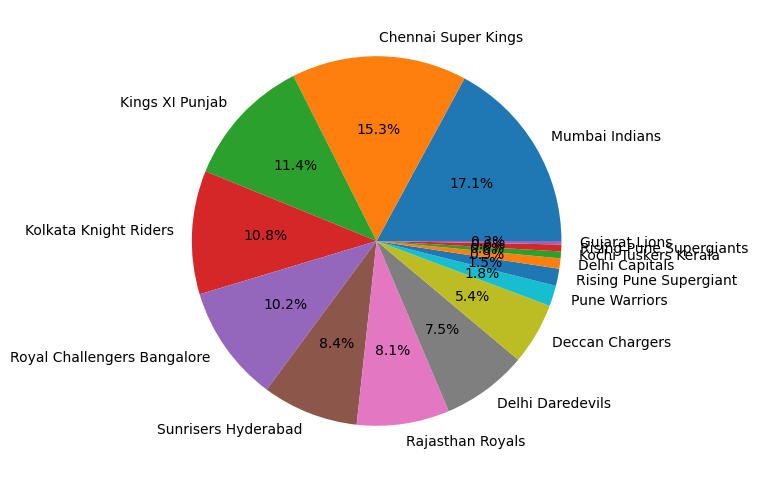

In [59]:
#Making a pie chart
plt.figure(figsize = (10,6))
plt.pie(batting_won["winner"].value_counts(), labels = list(batting_won['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [64]:
#extracting those records where a team has won after batting second
win_balling = ipl[ipl["win_by_wickets"]!=0]
win_balling.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


<Axes: xlabel='win_by_wickets', ylabel='Count'>

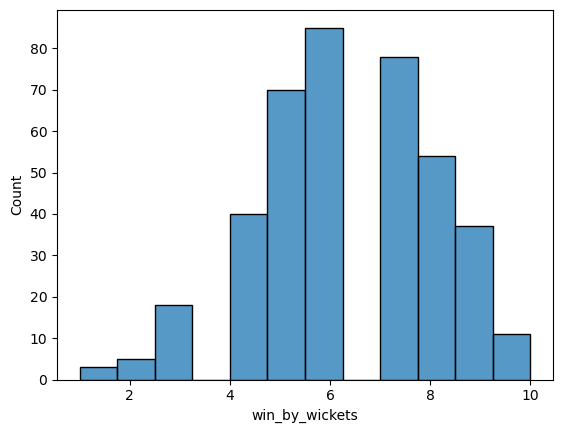

In [65]:
#Making a histogram for frequency of wins w.r.t number of wickets
sns.histplot(data = win_balling , x ="win_by_wickets")

In [76]:
#Finding out the frequency of number of wins w.r.t each time after batting second
ball_win = win_balling["winner"].value_counts().head().reset_index()
ball_win

,winner,count
0,Kolkata Knight Riders,56
1,Mumbai Indians,50
2,Royal Challengers Bangalore,47
3,Chennai Super Kings,47
4,Rajasthan Royals,46


<Axes: xlabel='winner', ylabel='count'>

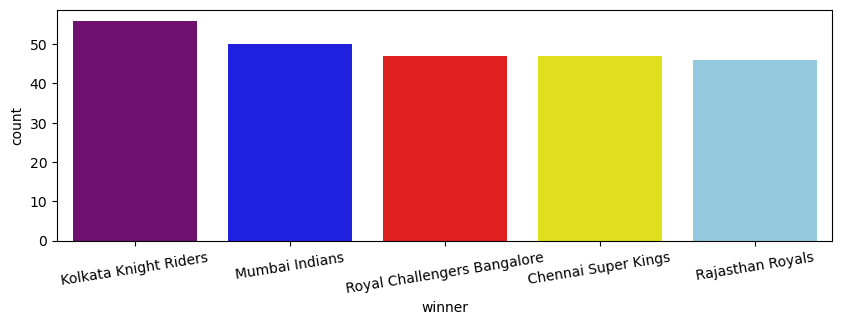

In [86]:
#Making a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize = (10,3))
plt.xticks (rotation =9)
sns.barplot(x="winner", y="count" ,data= ball_win, palette = ["purple","blue","red","yellow","skyblue"])

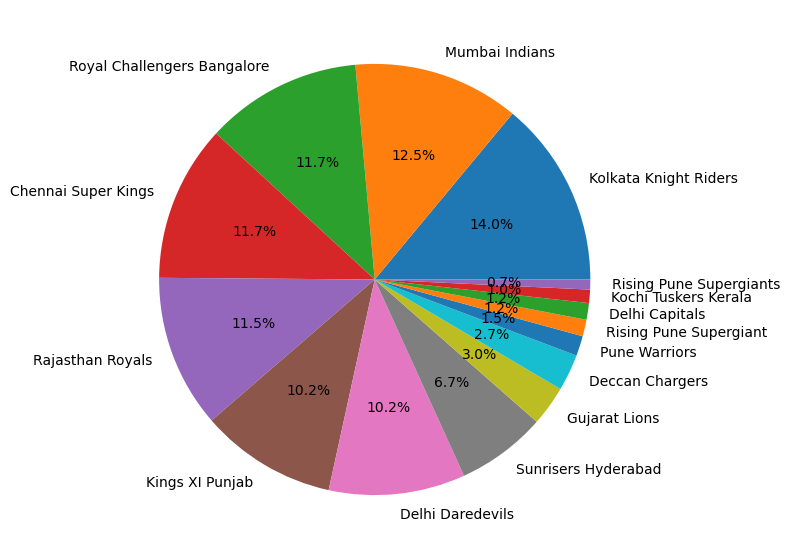

In [92]:
#Making a pie chart for distribution of most wins after batting second
plt.figure(figsize=(7,7))
plt.pie(list(win_balling['winner'].value_counts()),labels=list(win_balling['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [93]:
#Looking at the number of matches played each season
ipl["season"].value_counts()

season
2013    76
2012    74
2011    72
2010    60
2016    60
2018    60
2017    58
2008    58
2019    58
2009    57
2015    57
2014    53
Name: count, dtype: int64

In [94]:
#Looking at the number of matches played in each city
ipl["city"].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [99]:
#Finding out how many times a team has won the match after winning the toss
len(ipl[ipl["toss_winner"]==ipl["winner"]])

388

In [100]:
# Percentage of winning in both match and toss
len(ipl[ipl["toss_winner"]==ipl["winner"]]) / len(ipl) * 100

52.2207267833109